In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sb
import plotly.express as px
import datetime as dt
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/kpmginternship/transaction.csv
/kaggle/input/kpmgintern/NewCustomerList.csv
/kaggle/input/kpmgintern/CustomerAddress.csv
/kaggle/input/kpmgintern/CustomerDemographic.csv
/kaggle/input/kpmgintern/transaction.csv


In [2]:
customer_add = pd.read_csv("../input/kpmgintern/CustomerAddress.csv")
customer_demo = pd.read_csv('../input/kpmgintern/CustomerDemographic.csv')
new_customer_list = pd.read_csv('../input/kpmgintern/NewCustomerList.csv')
transaction = pd.read_csv('../input/kpmginternship/transaction.csv')

In [3]:
customer_demo.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,01-Feb,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [4]:
customer_demo.describe()

,customer_id,past_3_years_bike_related_purchases,tenure
count,4000.000000,4000.000000,3913.000000
mean,2000.500000,48.890000,10.657041
std,1154.844867,28.715005,5.660146
min,1.000000,0.000000,1.000000
25%,1000.750000,24.000000,6.000000
50%,2000.500000,48.000000,11.000000
75%,3000.250000,73.000000,15.000000
max,4000.000000,99.000000,22.000000


In [5]:
customer_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          4000 non-null   int64  
 1   first_name                           4000 non-null   object 
 2   last_name                            3875 non-null   object 
 3   gender                               4000 non-null   object 
 4   past_3_years_bike_related_purchases  4000 non-null   int64  
 5   DOB                                  3913 non-null   object 
 6   job_title                            3494 non-null   object 
 7   job_industry_category                3344 non-null   object 
 8   wealth_segment                       4000 non-null   object 
 9   deceased_indicator                   4000 non-null   object 
 10  default                              3698 non-null   object 
 11  owns_car                      

In [6]:
customer_demo.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

In [7]:
customer_demo.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'default', 'owns_car', 'tenure'],
      dtype='object')

In [8]:
customer_demo.owns_car.unique()

array(['Yes', 'No'], dtype=object)

In [9]:
customer_demo[customer_demo.gender.isin(['F', 'M', 'Femal'])]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
53,54,Loralyn,Wonfor,Femal,2,1966-07-24,Sales Associate,Property,Mass Customer,N,-0.5,Yes,18.0
56,57,Abba,Masedon,M,87,1988-06-13,Chief Design Engineer,NaN,Mass Customer,N,1E+02,Yes,13.0


In [10]:
customer_demo.duplicated().describe()

count      4000
unique        1
top       False
freq       4000
dtype: object

In [11]:
transaction.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,60,60,3473,18/12/17,False,Approved,Giant Bicycles,Standard,high,small,1977.36,1759.85,41848.0
1,143,60,2135,26/01/17,True,Approved,Giant Bicycles,Standard,high,small,1977.36,1759.85,41047.0
2,292,64,3380,28/10/17,False,Approved,Giant Bicycles,Standard,high,small,1977.36,1759.85,42172.0
3,413,60,720,09/09/17,False,Approved,Giant Bicycles,Standard,high,small,1977.36,1759.85,41848.0
4,699,60,1535,13/08/17,False,Approved,Giant Bicycles,Standard,high,small,1977.36,1759.85,40779.0


In [12]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   transaction_id           20000 non-null  int64  
 1   product_id               20000 non-null  int64  
 2   customer_id              20000 non-null  int64  
 3   transaction_date         20000 non-null  object 
 4   online_order             19640 non-null  object 
 5   order_status             20000 non-null  object 
 6   brand                    19803 non-null  object 
 7   product_line             19803 non-null  object 
 8   product_class            19803 non-null  object 
 9   product_size             19803 non-null  object 
 10  list_price               20000 non-null  float64
 11  standard_cost            19803 non-null  float64
 12  product_first_sold_date  19803 non-null  float64
dtypes: float64(3), int64(3), object(7)
memory usage: 2.0+ MB


In [13]:
transaction.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [14]:
transaction.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date'],
      dtype='object')

In [15]:
new_customer_list.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Unnamed: 16,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6.0,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11.0,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5.0,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1.0,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9.0,4,4,1.703125


In [16]:
del new_customer_list['Unnamed: 16']

In [17]:
new_customer_list.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6.0,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11.0,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5.0,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1.0,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9.0,4,1.703125


In [18]:
new_customer_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   first_name                           1000 non-null   object 
 1   last_name                            971 non-null    object 
 2   gender                               1000 non-null   object 
 3   past_3_years_bike_related_purchases  1000 non-null   int64  
 4   DOB                                  983 non-null    object 
 5   job_title                            894 non-null    object 
 6   job_industry_category                835 non-null    object 
 7   wealth_segment                       1000 non-null   object 
 8   deceased_indicator                   1000 non-null   object 
 9   owns_car                             1000 non-null   object 
 10  tenure                               1000 non-null   int64  
 11  address                        

In [19]:
new_customer_list.isnull().sum()

first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Rank                                     0
Value                                    0
dtype: int64

In [20]:
new_customer_list.columns

Index(['first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'Rank', 'Value'],
      dtype='object')

In [21]:
fig = px.scatter(new_customer_list, x = new_customer_list.Value, y = new_customer_list.Rank)
fig.update_layout(width=600, template='ggplot2')

In [22]:
customer_add.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [23]:
customer_add.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [24]:
customer_add.isnull().sum()

customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

In [25]:
customer_add.columns

Index(['customer_id', 'address', 'postcode', 'state', 'country',
       'property_valuation'],
      dtype='object')

In [26]:
customer_add.address.nunique()

3996

In [27]:
customer_add = customer_add.set_index('customer_id')

In [28]:
customer_demo = customer_demo.set_index('customer_id')

In [29]:
transaction = transaction.set_index('customer_id')

In [30]:
transaction.head()

,transaction_id,product_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
customer_id,,,,,,,,,,,,
3473,60,60,18/12/17,False,Approved,Giant Bicycles,Standard,high,small,1977.36,1759.85,41848.0
2135,143,60,26/01/17,True,Approved,Giant Bicycles,Standard,high,small,1977.36,1759.85,41047.0
3380,292,64,28/10/17,False,Approved,Giant Bicycles,Standard,high,small,1977.36,1759.85,42172.0
720,413,60,09/09/17,False,Approved,Giant Bicycles,Standard,high,small,1977.36,1759.85,41848.0
1535,699,60,13/08/17,False,Approved,Giant Bicycles,Standard,high,small,1977.36,1759.85,40779.0


In [31]:
complete_df = customer_add.join(customer_demo).join(transaction)

In [32]:
complete_df.columns

Index(['address', 'postcode', 'state', 'country', 'property_valuation',
       'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'default', 'owns_car', 'tenure', 'transaction_id', 'product_id',
       'transaction_date', 'online_order', 'order_status', 'brand',
       'product_line', 'product_class', 'product_size', 'list_price',
       'standard_cost', 'product_first_sold_date'],
      dtype='object')

In [33]:
complete_df.DOB = pd.to_datetime(complete_df.DOB)

In [34]:
complete_df.transation_date = pd.to_datetime(complete_df.transaction_date)

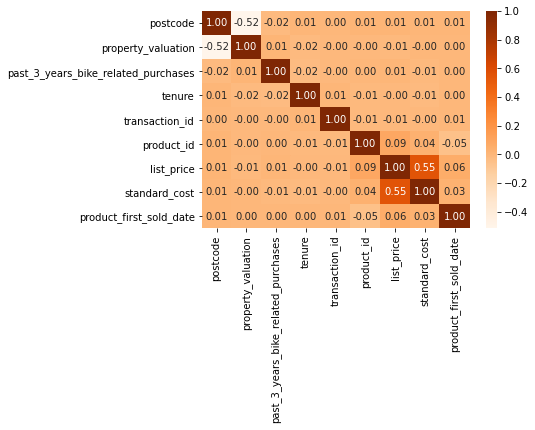

In [35]:
sb.heatmap(complete_df.corr(), cmap='Oranges', annot=True, fmt='.2f')

In [36]:
complete_df.shape

(20478, 29)

In [37]:
list(complete_df.columns)

['address',
 'postcode',
 'state',
 'country',
 'property_valuation',
 'first_name',
 'last_name',
 'gender',
 'past_3_years_bike_related_purchases',
 'DOB',
 'job_title',
 'job_industry_category',
 'wealth_segment',
 'deceased_indicator',
 'default',
 'owns_car',
 'tenure',
 'transaction_id',
 'product_id',
 'transaction_date',
 'online_order',
 'order_status',
 'brand',
 'product_line',
 'product_class',
 'product_size',
 'list_price',
 'standard_cost',
 'product_first_sold_date']

In [38]:
del complete_df['default']

In [39]:
obj = [x for x in complete_df.columns if complete_df[x].dtype=='object']
num = [x for x in complete_df.columns if complete_df[x].dtype!='object']

In [40]:
obj

['address',
 'state',
 'country',
 'first_name',
 'last_name',
 'gender',
 'job_title',
 'job_industry_category',
 'wealth_segment',
 'deceased_indicator',
 'owns_car',
 'transaction_date',
 'online_order',
 'order_status',
 'brand',
 'product_line',
 'product_class',
 'product_size']

In [41]:
num

['postcode',
 'property_valuation',
 'past_3_years_bike_related_purchases',
 'DOB',
 'tenure',
 'transaction_id',
 'product_id',
 'list_price',
 'standard_cost',
 'product_first_sold_date']

In [42]:
obj_df = complete_df[obj]

In [43]:
obj_df.head()

,address,state,country,first_name,last_name,gender,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,transaction_date,online_order,order_status,brand,product_line,product_class,product_size
customer_id,,,,,,,,,,,,,,,,,,
1,060 Morning Avenue,New South Wales,Australia,Laraine,Medendorp,F,Executive Secretary,Health,Mass Customer,N,Yes,11/05/17,True,Approved,Trek Bicycles,Road,low,small
1,060 Morning Avenue,New South Wales,Australia,Laraine,Medendorp,F,Executive Secretary,Health,Mass Customer,N,Yes,19/05/17,False,Approved,Giant Bicycles,Road,medium,medium
1,060 Morning Avenue,New South Wales,Australia,Laraine,Medendorp,F,Executive Secretary,Health,Mass Customer,N,Yes,06/04/17,True,Approved,Solex,Standard,medium,medium
1,060 Morning Avenue,New South Wales,Australia,Laraine,Medendorp,F,Executive Secretary,Health,Mass Customer,N,Yes,29/03/17,True,Approved,Giant Bicycles,Standard,high,medium
1,060 Morning Avenue,New South Wales,Australia,Laraine,Medendorp,F,Executive Secretary,Health,Mass Customer,N,Yes,09/12/17,True,Approved,OHM Cycles,Road,medium,medium


In [44]:
obj_df.index.value_counts()

2476    14
1068    14
2183    14
2464    13
2755    13
        ..
3504     1
852      1
2394     1
2074     1
3762     1
Name: customer_id, Length: 3999, dtype: int64

In [45]:
complete_df['product_class'].unique()

array(['low', 'medium', 'high', nan], dtype=object)

In [46]:
complete_df['product_line'].unique()

array(['Road', 'Standard', 'Mountain', 'Touring', nan], dtype=object)

low cardinality columns

In [47]:
low_card_cols = [col for col in complete_df.columns
                 if complete_df[col].nunique()<10 and complete_df[col].dtype=='object']
low_card_cols

['state',
 'country',
 'gender',
 'job_industry_category',
 'wealth_segment',
 'deceased_indicator',
 'owns_car',
 'online_order',
 'order_status',
 'brand',
 'product_line',
 'product_class',
 'product_size']

In [48]:
set(obj) - set(low_card_cols)

{'address', 'first_name', 'job_title', 'last_name', 'transaction_date'}

In [49]:
my_cols = low_card_cols + num
new_df = complete_df[my_cols].copy()

In [50]:
low_card_cols

['state',
 'country',
 'gender',
 'job_industry_category',
 'wealth_segment',
 'deceased_indicator',
 'owns_car',
 'online_order',
 'order_status',
 'brand',
 'product_line',
 'product_class',
 'product_size']

### delete product first sold date

In [51]:
del complete_df['product_first_sold_date']

In [52]:
complete_df

,address,postcode,state,country,property_valuation,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,...,product_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost
customer_id,,,,,,,,,,,,,,,,,,,,,
1,060 Morning Avenue,2016,New South Wales,Australia,10,Laraine,Medendorp,F,93.0,1953-10-12,...,47.0,11/05/17,True,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42
1,060 Morning Avenue,2016,New South Wales,Australia,10,Laraine,Medendorp,F,93.0,1953-10-12,...,25.0,19/05/17,False,Approved,Giant Bicycles,Road,medium,medium,1538.99,829.65
1,060 Morning Avenue,2016,New South Wales,Australia,10,Laraine,Medendorp,F,93.0,1953-10-12,...,38.0,06/04/17,True,Approved,Solex,Standard,medium,medium,1577.53,826.51
1,060 Morning Avenue,2016,New South Wales,Australia,10,Laraine,Medendorp,F,93.0,1953-10-12,...,11.0,29/03/17,True,Approved,Giant Bicycles,Standard,high,medium,1274.93,764.96
1,060 Morning Avenue,2016,New South Wales,Australia,10,Laraine,Medendorp,F,93.0,1953-10-12,...,9.0,09/12/17,True,Approved,OHM Cycles,Road,medium,medium,742.54,667.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3999,1482 Hauk Trail,3064,VIC,Australia,3,Patrizius,NaN,Male,11.0,1973-10-24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4000,57042 Village Green Point,4511,QLD,Australia,6,Kippy,Oldland,Male,76.0,1991-11-05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4001,87 Crescent Oaks Alley,2756,NSW,Australia,10,NaN,NaN,NaN,NaN,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
complete_df.columns

Index(['address', 'postcode', 'state', 'country', 'property_valuation',
       'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'transaction_id', 'product_id',
       'transaction_date', 'online_order', 'order_status', 'brand',
       'product_line', 'product_class', 'product_size', 'list_price',
       'standard_cost'],
      dtype='object')

In [54]:
complete_df.country.nunique()

1

In [55]:
del complete_df['country']

In [56]:
complete_df.columns

Index(['address', 'postcode', 'state', 'property_valuation', 'first_name',
       'last_name', 'gender', 'past_3_years_bike_related_purchases', 'DOB',
       'job_title', 'job_industry_category', 'wealth_segment',
       'deceased_indicator', 'owns_car', 'tenure', 'transaction_id',
       'product_id', 'transaction_date', 'online_order', 'order_status',
       'brand', 'product_line', 'product_class', 'product_size', 'list_price',
       'standard_cost'],
      dtype='object')

In [57]:
print(dt.date.today())

2021-04-23


In [58]:
today = dt.date.today()
complete_df['age'] = complete_df['DOB'].apply(lambda x: today.year - x.year - ((today.month, today.day) < (x.month, x.day)) )

In [59]:
clean_df = complete_df.dropna()

In [60]:
clean_df['age'] = clean_df['age'].astype('int64')

In [61]:
clean_df.columns

Index(['address', 'postcode', 'state', 'property_valuation', 'first_name',
       'last_name', 'gender', 'past_3_years_bike_related_purchases', 'DOB',
       'job_title', 'job_industry_category', 'wealth_segment',
       'deceased_indicator', 'owns_car', 'tenure', 'transaction_id',
       'product_id', 'transaction_date', 'online_order', 'order_status',
       'brand', 'product_line', 'product_class', 'product_size', 'list_price',
       'standard_cost', 'age'],
      dtype='object')

In [62]:
clean_df.head()

,address,postcode,state,property_valuation,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,...,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,age
customer_id,,,,,,,,,,,,,,,,,,,,,
1,060 Morning Avenue,2016,New South Wales,10,Laraine,Medendorp,F,93.0,1953-10-12,Executive Secretary,...,11/05/17,True,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,67
1,060 Morning Avenue,2016,New South Wales,10,Laraine,Medendorp,F,93.0,1953-10-12,Executive Secretary,...,19/05/17,False,Approved,Giant Bicycles,Road,medium,medium,1538.99,829.65,67
1,060 Morning Avenue,2016,New South Wales,10,Laraine,Medendorp,F,93.0,1953-10-12,Executive Secretary,...,06/04/17,True,Approved,Solex,Standard,medium,medium,1577.53,826.51,67
1,060 Morning Avenue,2016,New South Wales,10,Laraine,Medendorp,F,93.0,1953-10-12,Executive Secretary,...,29/03/17,True,Approved,Giant Bicycles,Standard,high,medium,1274.93,764.96,67
1,060 Morning Avenue,2016,New South Wales,10,Laraine,Medendorp,F,93.0,1953-10-12,Executive Secretary,...,09/12/17,True,Approved,OHM Cycles,Road,medium,medium,742.54,667.40,67


In [63]:
def product_class(x):
    if x == 'low':
        return 1
    elif x == 'medium':
        return 2
    elif x == 'high':
        return 3
    
clean_df['product_class'] = clean_df['product_class'].apply(product_class)

In [64]:
clean_df.head()

,address,postcode,state,property_valuation,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,...,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,age
customer_id,,,,,,,,,,,,,,,,,,,,,
1,060 Morning Avenue,2016,New South Wales,10,Laraine,Medendorp,F,93.0,1953-10-12,Executive Secretary,...,11/05/17,True,Approved,Trek Bicycles,Road,1,small,1720.70,1531.42,67
1,060 Morning Avenue,2016,New South Wales,10,Laraine,Medendorp,F,93.0,1953-10-12,Executive Secretary,...,19/05/17,False,Approved,Giant Bicycles,Road,2,medium,1538.99,829.65,67
1,060 Morning Avenue,2016,New South Wales,10,Laraine,Medendorp,F,93.0,1953-10-12,Executive Secretary,...,06/04/17,True,Approved,Solex,Standard,2,medium,1577.53,826.51,67
1,060 Morning Avenue,2016,New South Wales,10,Laraine,Medendorp,F,93.0,1953-10-12,Executive Secretary,...,29/03/17,True,Approved,Giant Bicycles,Standard,3,medium,1274.93,764.96,67
1,060 Morning Avenue,2016,New South Wales,10,Laraine,Medendorp,F,93.0,1953-10-12,Executive Secretary,...,09/12/17,True,Approved,OHM Cycles,Road,2,medium,742.54,667.40,67


In [65]:
clean_df.groupby('product_class').product_id.count()

product_class
1    2032
2    9490
3    2114
Name: product_id, dtype: int64

In [66]:
clean_df.product_class.value_counts()

2    9490
3    2114
1    2032
Name: product_class, dtype: int64

In [67]:
clean_df.gender.unique()

array(['F', 'Male', 'Female', 'U', 'Femal'], dtype=object)

In [68]:
def gender(x):
    if x == 'Femal':
        return 'Female'
    elif x == 'F':
        return 'Female'
    elif x == 'Male':
        return 'Male'
    elif x == 'U':
        return 'Unknown'
    elif x == 'Female':
        return 'Female'

clean_df['gender'] = clean_df['gender'].apply(gender)

In [69]:
clean_df.gender.unique()

array(['Female', 'Male', 'Unknown'], dtype=object)

In [70]:
list(clean_df.columns)

['address',
 'postcode',
 'state',
 'property_valuation',
 'first_name',
 'last_name',
 'gender',
 'past_3_years_bike_related_purchases',
 'DOB',
 'job_title',
 'job_industry_category',
 'wealth_segment',
 'deceased_indicator',
 'owns_car',
 'tenure',
 'transaction_id',
 'product_id',
 'transaction_date',
 'online_order',
 'order_status',
 'brand',
 'product_line',
 'product_class',
 'product_size',
 'list_price',
 'standard_cost',
 'age']

## customer who spends more and often
## Customer who spends often is more valuable to the company

# Important Columns

deceased_indicator, 

past_3_years_bike_related_purchases,

property_valuation,

product_class does not have any affect on standard cost,

standard_cost,

list_price,

brand,


In [71]:
clean_df.deceased_indicator.value_counts()

N    13628
Y        8
Name: deceased_indicator, dtype: int64

In [72]:
clean_df.product_line.unique()

array(['Road', 'Standard', 'Mountain', 'Touring'], dtype=object)

In [73]:
clean_df.brand.unique()

array(['Trek Bicycles', 'Giant Bicycles', 'Solex', 'OHM Cycles',
       'Norco Bicycles', 'WeareA2B'], dtype=object)

In [74]:
clean_df.wealth_segment.unique()

array(['Mass Customer', 'Affluent Customer', 'High Net Worth'],
      dtype=object)

In [75]:
clean_df.sort_values(by='standard_cost', ascending=False)

,address,postcode,state,property_valuation,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,...,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,age
customer_id,,,,,,,,,,,,,,,,,,,,,
172,35386 Mockingbird Road,3749,VIC,4,Hilton,Carney,Male,54.0,1988-09-12,Editor,...,17/06/17,False,Approved,Giant Bicycles,Standard,3,small,1977.36,1759.85,32
1429,3 Rigney Center,2794,NSW,2,Dante,Jikylls,Male,94.0,1980-12-03,Legal Assistant,...,05/03/17,True,Approved,Giant Bicycles,Standard,3,small,1977.36,1759.85,40
1482,7231 Pepper Wood Point,2428,NSW,8,Georas,Niesel,Male,29.0,1979-04-30,Electrical Engineer,...,28/03/17,False,Approved,Giant Bicycles,Standard,3,small,1977.36,1759.85,41
718,8080 Victoria Plaza,4217,QLD,11,Cathe,Lorriman,Female,38.0,1978-02-18,Engineer I,...,03/09/17,True,Approved,Giant Bicycles,Standard,3,small,1977.36,1759.85,43
54,6 Homewood Avenue,2142,New South Wales,8,Loralyn,Wonfor,Female,2.0,1966-07-24,Sales Associate,...,24/10/17,False,Approved,Giant Bicycles,Standard,3,small,1977.36,1759.85,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458,19964 Nancy Drive,3121,Victoria,8,Osborn,Pentony,Male,57.0,1969-04-21,Account Representative IV,...,18/11/17,True,Approved,OHM Cycles,Road,3,large,12.01,7.21,52
1942,184 Hoepker Way,2197,NSW,9,Abe,Townby,Male,0.0,1987-01-08,Programmer Analyst II,...,14/04/17,True,Approved,OHM Cycles,Road,3,large,12.01,7.21,34
2254,8718 Warner Avenue,2148,NSW,8,Ann,Beek,Female,36.0,1955-10-21,Programmer Analyst II,...,22/09/17,True,Approved,OHM Cycles,Road,3,large,12.01,7.21,65


In [76]:
from sklearn.preprocessing import OneHotEncoder

OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(clean_df[['brand', 'wealth_segment', 'product_line']]))

In [77]:
OH_cols.index = clean_df.index

In [78]:
OH_cols.columns = OH_encoder.get_feature_names()

In [79]:
OH_cols

,x0_Giant Bicycles,x0_Norco Bicycles,x0_OHM Cycles,x0_Solex,x0_Trek Bicycles,x0_WeareA2B,x1_Affluent Customer,x1_High Net Worth,x1_Mass Customer,x2_Mountain,x2_Road,x2_Standard,x2_Touring
customer_id,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3496,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3496,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3497,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [80]:
clean_df = clean_df.drop(['brand', 'wealth_segment', 'product_line'], axis=1)

In [81]:
clean_df = pd.concat([clean_df, OH_cols], axis=1)

In [82]:
clean_df

,address,postcode,state,property_valuation,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,...,x0_Solex,x0_Trek Bicycles,x0_WeareA2B,x1_Affluent Customer,x1_High Net Worth,x1_Mass Customer,x2_Mountain,x2_Road,x2_Standard,x2_Touring
customer_id,,,,,,,,,,,,,,,,,,,,,
1,060 Morning Avenue,2016,New South Wales,10,Laraine,Medendorp,Female,93.0,1953-10-12,Executive Secretary,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,060 Morning Avenue,2016,New South Wales,10,Laraine,Medendorp,Female,93.0,1953-10-12,Executive Secretary,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,060 Morning Avenue,2016,New South Wales,10,Laraine,Medendorp,Female,93.0,1953-10-12,Executive Secretary,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,060 Morning Avenue,2016,New South Wales,10,Laraine,Medendorp,Female,93.0,1953-10-12,Executive Secretary,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,060 Morning Avenue,2016,New South Wales,10,Laraine,Medendorp,Female,93.0,1953-10-12,Executive Secretary,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3496,2565 Caliangt Point,2171,NSW,9,Danya,Burnyeat,Male,99.0,1986-04-25,Editor,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3496,2565 Caliangt Point,2171,NSW,9,Danya,Burnyeat,Male,99.0,1986-04-25,Editor,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3497,96 Delladonna Trail,3976,VIC,5,Thia,O'Day,Female,73.0,1986-05-03,Administrative Assistant IV,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


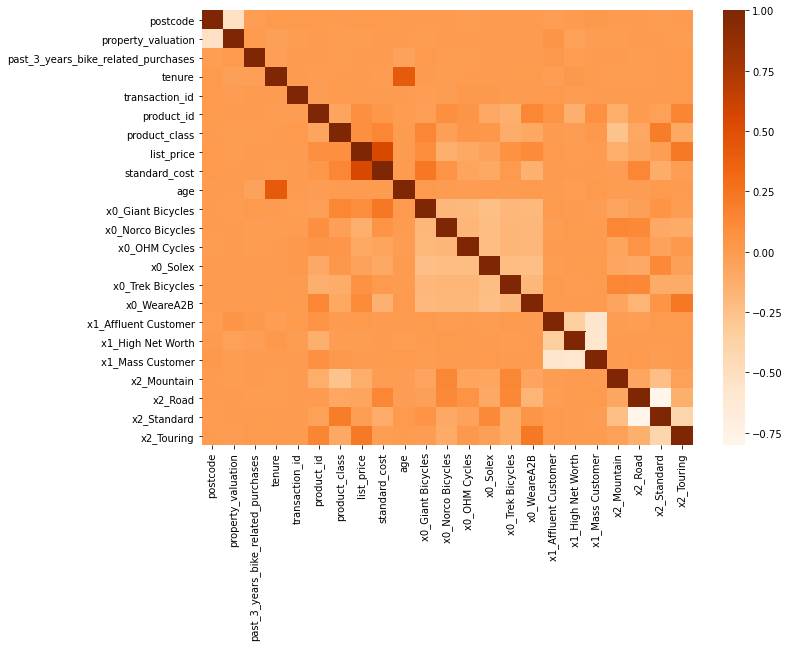

In [83]:
corrmat = clean_df.corr()
plt.subplots(figsize=(11,8))
sb.heatmap(corrmat, cmap='Oranges')

In [84]:
clean_df.head()

,address,postcode,state,property_valuation,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,...,x0_Solex,x0_Trek Bicycles,x0_WeareA2B,x1_Affluent Customer,x1_High Net Worth,x1_Mass Customer,x2_Mountain,x2_Road,x2_Standard,x2_Touring
customer_id,,,,,,,,,,,,,,,,,,,,,
1,060 Morning Avenue,2016,New South Wales,10,Laraine,Medendorp,Female,93.0,1953-10-12,Executive Secretary,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,060 Morning Avenue,2016,New South Wales,10,Laraine,Medendorp,Female,93.0,1953-10-12,Executive Secretary,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,060 Morning Avenue,2016,New South Wales,10,Laraine,Medendorp,Female,93.0,1953-10-12,Executive Secretary,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,060 Morning Avenue,2016,New South Wales,10,Laraine,Medendorp,Female,93.0,1953-10-12,Executive Secretary,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,060 Morning Avenue,2016,New South Wales,10,Laraine,Medendorp,Female,93.0,1953-10-12,Executive Secretary,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [85]:
clean_df.groupby('customer_id')['standard_cost'].sum().sort_values(ascending=False).head(20)

customer_id
2183    12558.02
1302    11699.10
2309     8960.35
3060     8924.49
3204     8798.28
3427     8602.17
142      8557.40
637      8497.26
906      8446.42
1317     8346.10
1950     8291.31
3020     8241.50
2788     8197.47
1103     8080.04
2880     8007.96
1517     7871.93
2240     7833.15
3118     7821.21
844      7793.23
652      7751.97
Name: standard_cost, dtype: float64

In [86]:
clean_df.index.value_counts().head(20)

2476    14
2183    14
637     13
2464    13
3232    13
1302    13
1913    13
2072    13
3326    13
39      12
2914    12
1821    12
2659    12
1103    12
25      12
2240    12
2309    12
1762    12
177     12
1745    12
Name: customer_id, dtype: int64

In [87]:
clean_df.age.value_counts()

43     847
42     656
44     579
46     517
47     485
45     422
40     417
41     412
35     353
61     325
31     324
34     316
26     309
56     291
22     289
51     288
33     276
54     272
28     269
32     263
25     261
53     258
24     257
57     240
62     238
49     237
48     234
39     232
64     229
55     229
23     225
52     222
58     211
21     209
59     197
36     192
63     189
60     189
27     183
65     177
38     177
50     169
66     168
29     165
67     153
30     139
20     127
19     103
37      81
77      12
89      10
177      8
85       5
Name: age, dtype: int64

In [88]:
clean_df = clean_df.drop(clean_df[clean_df['age'] == 176].index)

In [89]:
clean_df.groupby('customer_id').age.value_counts().sort_values(ascending=False).head(20)

customer_id  age
2476         64     14
2183         49     14
637          44     13
1302         22     13
3326         46     13
2072         61     13
1913         47     13
2464         38     13
3232         27     13
1227         31     12
2659         46     12
3048         51     12
1821         49     12
2914         38     12
1762         42     12
1745         65     12
2240         51     12
177          31     12
2309         36     12
25           44     12
Name: age, dtype: int64

In [90]:
clean_df.columns

Index(['address', 'postcode', 'state', 'property_valuation', 'first_name',
       'last_name', 'gender', 'past_3_years_bike_related_purchases', 'DOB',
       'job_title', 'job_industry_category', 'deceased_indicator', 'owns_car',
       'tenure', 'transaction_id', 'product_id', 'transaction_date',
       'online_order', 'order_status', 'product_class', 'product_size',
       'list_price', 'standard_cost', 'age', 'x0_Giant Bicycles',
       'x0_Norco Bicycles', 'x0_OHM Cycles', 'x0_Solex', 'x0_Trek Bicycles',
       'x0_WeareA2B', 'x1_Affluent Customer', 'x1_High Net Worth',
       'x1_Mass Customer', 'x2_Mountain', 'x2_Road', 'x2_Standard',
       'x2_Touring'],
      dtype='object')

In [91]:
clean_df.groupby('customer_id').product_class.value_counts().sort_values(ascending=False)

customer_id  product_class
3326         2                11
2476         2                11
1762         2                11
25           2                10
2659         2                10
                              ..
2751         3                 1
1300         1                 1
1298         1                 1
2753         1                 1
1730         1                 1
Name: product_class, Length: 5226, dtype: int64

In [92]:
fig = px.bar(clean_df['product_class'].value_counts())
fig.update_layout(title='Product Class', xaxis_title='product class', yaxis_title='count')

In [93]:
clean_df.groupby('customer_id').past_3_years_bike_related_purchases.sum().sort_values(ascending=False)

customer_id
3326    1079.0
1821    1068.0
2874    1067.0
3420    1056.0
3217    1045.0
         ...  
2777       0.0
1214       0.0
428        0.0
3143       0.0
2712       0.0
Name: past_3_years_bike_related_purchases, Length: 2447, dtype: float64

In [94]:
clean_df.groupby('owns_car').standard_cost.sum()

owns_car
No     3731929.88
Yes    3878621.79
Name: standard_cost, dtype: float64